In [ ]:
#!/usr/bin/python
# Filename: new_compute_response_ssw_events.py
#
# Code by Hilla Gerstman
#
# This file provides code for computing the anomalies in cyclone frequency
# for specific event dates in S2S forecasts of the ECMWF prediction system, 
# and ERA-5 reanalsyis data. 
# The code can be useful as processing and visualization of S2S files and data.

############################################################################################


In [2]:
%matplotlib inline

from netCDF4 import Dataset as ncread
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.path as mpath
from matplotlib.patches import Rectangle


# import matplotlib
import matplotlib.ticker
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# matplotlib.rc('xtick', labelsize=15); matplotlib.rc('ytick', labelsize=15)

# from mpl_toolkits.basemap import Basemap

In [4]:
# ---------------------------------
# First, load latitude, longitude
# ---------------------------------
filedir = '/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/'
filename = 'MSL_2000-2019-04-27_2020-04-27_cf.nc'
filepath = filedir+filename

print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude = NC.variables['latitude'][:]
longitude = NC.variables['longitude'][:]

# get orography:
orog = NC.variables['orog'][:]

NC.close()

/net/cfc/s2s/owulff/phd/data/s2sdat/ECMWF/sfc/MSL/MSL_2000-2019-04-27_2020-04-27_cf.nc


In [8]:
# ---------------------------------
# Next, load cyclone frequency and compute anomalies with respect to climatology 
# (20-yr mean due to limited record of the reforecasts)


# ---------------------------------
# This function loads and computed anomaly for each event date
# ---------------------------------
def compute_anom_for_each_lead_time(selday,selmon,selyear,veryear,starting_date):
    mm = selmon # selected month
    dd = selday # selected day
    filedir = '/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/'
    filename = 'MSL_%s-%s-%s-%s_%s-%s-%s_pf.nc.mincl.nc' % (veryear-20,veryear-1,mm,dd,veryear,mm,dd)
    filepath = filedir+filename
    print(filepath)
    NC = ncread(filepath)    
    # ---------------------------------
    # get the field of the variable we're interested in:
    # ---------------------------------
    FLAG = NC.variables['FLAG'][:]
    print(FLAG.shape)
    # time = NC.variables['time'][:]
    NC.close()
    flag_ensm = FLAG
    flag_ensm=np.mean(FLAG, axis=0)
    period_len = 28
    add_date = 0
    flag_re = np.reshape(FLAG,(10,20,47,181,360));
    print(flag_re.shape)
    flag_re_em = np.mean(flag_re, axis=0) #ens mean
    flag_re_clim = np.mean(flag_re_em, axis=0) # 20-yr mean
    print(flag_re_clim.shape)
    # ---------------------------------
    # compute anomaly, keep ens members
    # ---------------------------------
    flag_anom_mem = np.zeros_like(flag_re)
    for ii in range(0,10):
        flag_anom = flag_re[ii,:,:,:,:] - flag_re_clim[:,:,:]
        print(flag_anom.shape)
        flag_anom_mem[ii,:,:,:,:]=flag_anom
    print(flag_anom_mem.shape)
    # ---------------------------------
    # average daily field for the first 30 days
    # ---------------------------------
    flag_anom_30d = flag_anom_mem[:,:,starting_date:period_len+starting_date,:,:]
    # ---------------------------------
    # 30-day anomaly for certain year
    # ---------------------------------
    yyear = np.arange(veryear-20,veryear);
    ind = np.where(yyear == selyear)
    print(ind[0])
    flag_anom_sel = np.squeeze(flag_anom_30d[:,ind[0],:,:,:])
    print(flag_anom_sel.shape)
    return flag_anom_sel


# ----- Event dates ---------------------------
# ---- for a test case (1 event) --------
# lead_days = ["10"]
# lead_mons = ["02"]
# lead_years = [2010]
# ver_years = [2020]
# arr_len = 1 # length of dates array
# ---------------------------------

# ---- test case (2 events) --------
lead_days = ["02","13"]
lead_mons = ["01","02"]
lead_years = [2019,2018]
ver_years = [2020,2020]
arr_len = 2 # length of dates array
# ---------------------------------

# ---------------------------------
# ----full list of events--------
# lead_days = ["02","13","06","26","10","27","24","24","23","06","20","30","13","23"];#,"27","16"
# lead_mons = ["01","02","01","03","02","01","02","02","01","01","01","12","02","03"]#,"02","12"
# lead_years = [2019,2018,2013,2010,2010,2009,2008,2007,2006,2004,2003,2001,2001,2000];#,1999,1998
# ver_years = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2019,2020,2020];#,2020,2019
# arr_len = 14 # length of dates array
# %----------------------------------

# For each forecast: x:x+period_len
# where is x is starting_date.

# Here we define the starting date of the forecast (this variable can be use to control the lead time)
starting_dates =  0*np.arange(arr_len,dtype=int)
tseries_model_es = np.zeros((10,28,len(latitude),len(longitude),len(lead_days)))
ssw_ind=0

# ---------------------------------
# Loop for each event in the list of dates:
# ---------------------------------
for i in range(len(lead_days)):
    selday = lead_days[i]
    selmon = lead_mons[i]
    selyear = lead_years[i]
    veryear = ver_years[i]
    starting_date = starting_dates[i]
    ind_returned = compute_anom_for_each_lead_time(selday,selmon,selyear,veryear,starting_date)
    tseries_model_es[:,:,:,:,ssw_ind]= ind_returned
    ssw_ind = ssw_ind +1




/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_2000-2019-01-02_2020-01-02_pf.nc.mincl.nc
(10, 940, 181, 360)
(10, 20, 47, 181, 360)
(47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(10, 20, 47, 181, 360)
[19]
(10, 28, 181, 360)
/net/litho/atmosdyn2/michaesp/mincl.seasonal.forecasts/out/MSL_2000-2019-02-13_2020-02-13_pf.nc.mincl.nc
(10, 940, 181, 360)
(10, 20, 47, 181, 360)
(47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(20, 47, 181, 360)
(10, 20, 47, 181, 360)
[18]
(10, 28, 181, 360)


(10, 28, 181, 360, 2)
[ 0.805 -0.1  ]


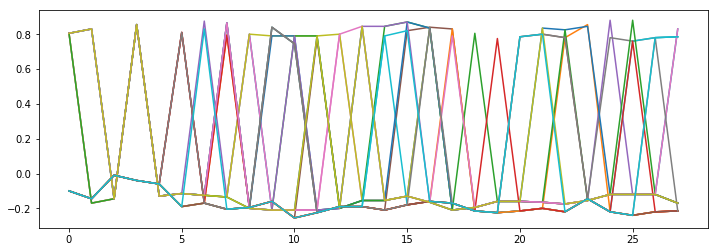

In [9]:
# ---------------------------------
# plot ensemble of forecasts at a random grid point 
# (to visually check if loaded properly):
# ---------------------------------
xr=30
yr=30
data = tseries_model_es
print(data.shape)
clim_u_test=data[:,:,xr,yr,:]

# figure plotting
fig = plt.figure(figsize=(12,4),facecolor='none')

# loop on ens members (total 10):
for ii in range(0,10):
    plt.plot(np.arange(0,28),clim_u_test[ii,:])

print(tseries_model_es[1,0,xr,yr,:])


In [10]:
# ---------------------------------
# Load climatology files from ERA-5 (already processed using CDO/NCO):
# ---------------------------------

filedir = '/s2s/hillag/cyclone_00/'
filename = 'daily_merged_2000_2020_00_regrid.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  

# get the grid:
latitude_c = NC.variables['lat'][:]
longitude_c = NC.variables['lon'][:]

# get cyclone frequency data:
cyc = NC.variables['INPUT'][:]

NC.close()

#-------

filedir = '/s2s/hillag/cyclone_00/'
filename = 'daily_merged_2000_2020_00_regrid.nc';
filepath = filedir+filename
print(filepath)
NC = ncread(filepath)  
# get the field of the variable we're interested in:
cyc_all = NC.variables['INPUT'][:]
NC.close()

# reshape:
cyc_years = np.transpose(cyc_all,(1,0,2,3))
# compute climatology (20-yr average):
cyc_clim = np.mean(cyc_years,axis=0)
# compute anomalies:
cyc_anom = cyc_years - cyc_clim



/s2s/hillag/cyclone_00/daily_merged_2000_2020_00_regrid.nc
/s2s/hillag/cyclone_00/daily_merged_2000_2020_00_regrid.nc
(21, 365, 181, 360)


In [11]:
# ---------------------------------
# This function computes the cyclone frequency anomaly based on observations
# ---------------------------------
def get_anomaly_from_obs(cyc_anom,selyear,day_of_year,latitude_c,longitude_c):   
    # average daily field for the first 30 days
    period_len = 28
    add_date = 0
    if day_of_year>330:
        period_len2 = 365-day_of_year
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len2)
        print(days_range)
        cyc_anom_30d = cyc_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        cyc_anom_sel2 = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
        if cyc_anom_sel2.shape[0]==181:
            cyc_anom_sel2 = cyc_anom_sel2[np.newaxis, :,:]   
        period_len3=period_len-period_len2
        print(np.arange(0+add_date,0+add_date+period_len3))
        cyc_anom_30d = cyc_anom[:,0+add_date:0+add_date+period_len3,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear+1)
        cyc_anom_sel3 = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
        print(cyc_anom_sel2.shape)
        print(cyc_anom_sel3.shape)
        cyc_anom_sel=np.append(cyc_anom_sel2,cyc_anom_sel3,axis=0)
    else:
        days_range=np.arange(day_of_year+add_date,day_of_year+add_date+period_len)
        print(days_range)
        cyc_anom_30d = cyc_anom[:,days_range,:,:]
        yyear = np.arange(2000,2020);
        ind = np.where(yyear == selyear)
        cyc_anom_sel = np.squeeze(cyc_anom_30d[ind[0],:,:,:]);
    print(cyc_anom_sel.shape)
    return cyc_anom_sel

tseries_obs = np.zeros((28,len(latitude_c),len(longitude_c),len(lead_days)))
ssw_ind=0;

# use the same date list as for the forecasts, and compute the anomaly in the reanlaysis:

# ---------------------------------
# Loop over events:
# ---------------------------------
for i in range(len(lead_days)):
    selday = np.array(lead_days)[i].astype(int)
    selmon= np.array(lead_mons)[i].astype(int)
    selyear = np.array(lead_years)[i].astype(int)
    day_of_year = date(selyear, selmon, selday).timetuple().tm_yday;
    print("Day of year: ", day_of_year, "\n");
    ind_returned_obs = get_anomaly_from_obs(cyc_anom,selyear,day_of_year,latitude_c,longitude_c); 
    tseries_obs[:,:,:,ssw_ind]=ind_returned_obs
    ssw_ind = ssw_ind+1

    

Day of year:  2 

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
(28, 181, 360)
Day of year:  44 

[44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71]
(28, 181, 360)


In [15]:
# ---------------------------------
# load some additional datasets for the plotting:
# ---------------------------------

# load climatology file, based on DJFM, week1 (weekly data), lead time 0, and 20-yr data:
fn = './cyc_djfm_clim_week1_lead0.nc'
NC = ncread(fn)
cyc_clim_model = NC.variables['__xarray_dataarray_variable__'][:]


# load climatology obs, DJFM, week1 (weekly data):
fn = './cyc_djfm_clim_obs_week1_lead0.nc'
NC = ncread(fn)
cyc_clim_obs = NC.variables['__xarray_dataarray_variable__'][:]


# load latitude, longitude for the reanalysis data:
selyear = 1979
filedir = '/s2s/hillag/cyclone/'
filename = 'cyc_era_clim_split.nc%s.nc' %(selyear) 
filepath = filedir+filename
NC = ncread(filepath)  
# get the grid:
latitude_c2 = NC.variables['lat'][:]
longitude_c2 = NC.variables['lon'][:]
NC.close()



In [17]:
# ---------------------------------
# compute different means:
# ---------------------------------

# average over the first 28 days
tseries_obs_time_avg=np.nanmean(tseries_obs,axis=0)
tseries_model_es_em = np.mean(tseries_model_es,axis=0)
tseries_model_time_avg_em=np.nanmean(tseries_model_es_em,axis=0)

# ensemble mean
# tseries_model_time_avg_em =np.mean(tseries_model_time_avg,axis=0)

# average over the first 10 days
# tseries_obs_time_avg=np.nanmean(tseries_obs[np.arange(0,10),:,:,:],axis=0)
# tseries_model_time_avg=np.nanmean(tseries_model_es[np.arange(0,10),:,:,:],axis=0)

# average over all events:
cyc_anom_avg=np.mean(tseries_model_time_avg_em,axis=2)
cyc_anom_avg_obs=np.mean(tseries_obs_time_avg,axis=2)




In [18]:
# can use [storemagic] to store variables in IPython’s database

# For temporarily storing the data (to be used by other scripts):
# %store tseries_model_time_avg_em
# %store tseries_obs_time_avg



In [22]:
# Compute the significance for cyc freq anomalies

from scipy import stats

# Calculate the T-test for the means of two independent samples of scores.
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.

# ---------------------------------
# for the model (forecasts):
# ---------------------------------
X=tseries_model_time_avg_em
yy,tt,ll = X.shape
p_array_cyc_model = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_model[ii,jj]=p
        
# ---------------------------------
# for the reanlaysis (obs):
# ---------------------------------
X=tseries_obs_time_avg
yy,tt,ll = X.shape
p_array_cyc_obs = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_obs[ii,jj]=p
        
# ---------------------------------
# for the difference between the two time series
# ---------------------------------
X=tseries_model_time_avg_em
Y=tseries_obs_time_avg[::-1,0:360,:]
# Y=np.roll(tseries_obs_time_avg[::-1,0:360,:],180, axis=1)
yy,tt,ll = X.shape
p_array_cyc_diff = np.zeros((yy,tt))

for ii in np.arange(0,yy,1):
    for jj in np.arange(0,tt,1):
        ttest_result, p = stats.ttest_ind(X[ii,jj,:]-Y[ii,jj,:], 0*X[ii,jj,:])
        p_array_cyc_diff[ii,jj]=p
        

# ---------------------------------
# cyc_anom_avg-cyc_anom_avg_obs[::-1,:]
# ---------------------------------


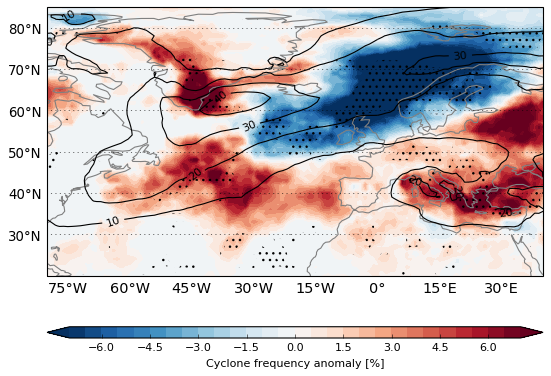

In [23]:
#----------------------------------------------------------------------
# Plot mean response averaged over all events (based on the forecast/model data):
#-----------------------------

plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]

#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg, coord=longitude)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_model, coord=longitude)


h1 = ax.contourf(cyclic_lons,latitude, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}

#----------------------------------------------------------------------
# Save to file
#----------------------------------------------------------------------
savelocation="Figures/"
savefileName='cyc_anom_ssw_vortex_events_2cases.pdf'
fig.savefig(savelocation+savefileName)



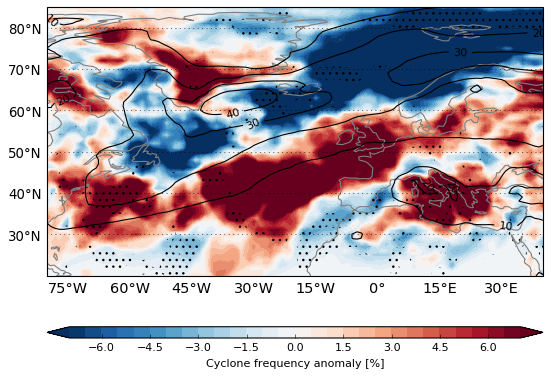

In [24]:
#----------------------------------------------------------------------
# Plot mean response in observations averaged over all events:
#----------------------------------------------------------------------

plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s}"

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.05]


#plot your field:
flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg_obs, coord=longitude_c)
flag_ensm_clim, cyclic_lons2 = add_cyclic_point(cyc_clim_obs, coord=longitude_c2)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_obs, coord=longitude_c)


h1 = ax.contourf(cyclic_lons,latitude_c, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons2,latitude_c, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude_c, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


#----------------------------------------------------------------------
# Save to file
#----------------------------------------------------------------------
savelocation="Figures/"
savefileName='cyc_anom_ssw_vortex_events_obs_2cases.pdf'
fig.savefig(savelocation+savefileName)



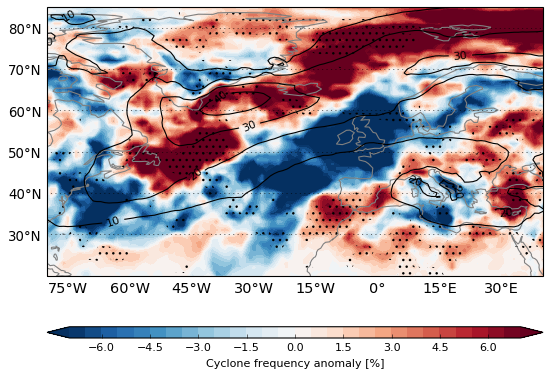

In [25]:
#----------------------------------------------------------------------
# Plot diff between the two datasets:
#----------------------------------------------------------------------

plt.style.use('classic')

#create the figure default:
fig = plt.figure(figsize=(8,8),facecolor='none')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 80], crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.LAND.with_scale('110m'))

color = 'RdBu_r' ##'PuBu' 
#colorbar options:
colorbarMin=-7
colorbarMax=7
colorspace=0.5
clevel = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

colorbarMin=0
colorbarMax=50
colorspace=10
clevel2 = np.arange(colorbarMin,colorbarMax+colorspace,colorspace)

# set hatching for each level
hatches =  ['', '..']
p_levels = [0.0, 0.10]

#plot your field:
X=tseries_model_time_avg_em
Y=tseries_obs_time_avg[::-1,:,:]
          
# flag_anom_sel, cyclic_lons = add_cyclic_point(cyc_anom_avg-cyc_anom_avg_obs[::-1,:], coord=longitude)
flag_anom_sel, cyclic_lons = add_cyclic_point(np.mean(X,axis=2)-np.mean(Y,axis=2), coord=longitude)
flag_ensm_clim, cyclic_lons = add_cyclic_point(cyc_clim_model, coord=longitude)
flag_ensm_stat, cyclic_lons = add_cyclic_point(p_array_cyc_diff, coord=longitude)


h1 = ax.contourf(cyclic_lons,latitude, 100*flag_anom_sel, clevel, cmap=color,extend='both')
h2 = ax.contour(cyclic_lons,latitude, 100*flag_ensm_clim,clevel2,colors=['black'],linewidths=1)
ax.clabel(h2, h2.levels, inline=True, fmt=fmt,fontsize=10)
hs = ax.contourf(cyclic_lons, latitude, flag_ensm_stat, levels=p_levels, hatches=hatches,
                  colors='none',extend='both')


#plot the colorbar:
cbar = plt.colorbar(h1, orientation='horizontal', shrink=1,fraction=0.1,pad=0.1,aspect=40)
cbar.ax.tick_params(labelsize=10) 
colorLabel='Cyclone frequency anomaly [%]' #$FLAG$
cbar.set_label(label=colorLabel,fontsize=10)

ax.coastlines(color='grey')
ax.set_extent([-80, 40, 20, 80])
# ax.gridlines(draw_labels=True, dms=True, x_inline=True, y_inline=False)


ax.set_xticks([45])
# matplotlib.pyplot.xlabel("Longitude")
# matplotlib.pyplot.ylabel("Latitude")
ax.set_visible(True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13, 'color': 'black'}


from matplotlib.patches import Rectangle

# Add the patch to the Axes
# left, bottom, width, height 
plt.gca().add_patch(Rectangle((300,150),60,20,linewidth=1,edgecolor='k',facecolor='none'))

#----------------------------------------------------------------------
# Save to file
#----------------------------------------------------------------------
savelocation="Figures/"
savefileName='cyc_anom_diff_ssw_model_minus_obs_2cases.pdf'
fig.savefig(savelocation+savefileName)



<Figure size 480x480 with 0 Axes>

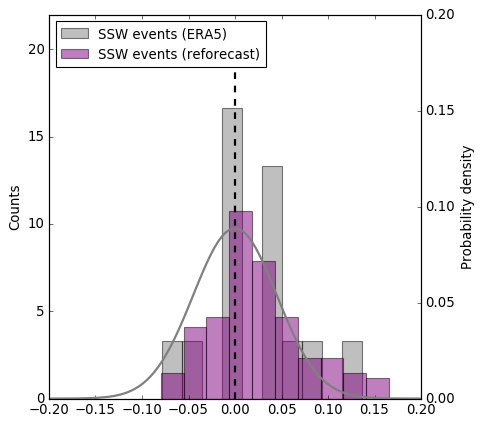

In [180]:
#----------------------------------------------------------------------
# HIST compare distributions
#----------------------------------------------------------------------

# we compare these two time series:
# tseries_obs_atl_avg
# tseries_model_es_atl_avg

# we do average over 28 days, and over selected region
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('classic')
fig = plt.figure(figsize=(6,6),facecolor='none')
fig, ax1 = plt.subplots(figsize=(6,6),facecolor='none')
ax2 = ax1.twinx()

bins=np.linspace(-1,1,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
data = np.sort(tseries_obs_atl_avg.flatten())
# the histogram of the data
n, bins, patches = ax1.hist(data, 10, density=True, facecolor='grey', alpha=0.5, label='x')
   
data2 = np.sort(tseries_model_es_atl_avg.flatten())
n, bins, patches = ax1.hist(data2, 10, density=True, facecolor='purple', alpha=0.5, label='y')

# data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
# n, bins, patches = plt.hist(data3, 10, density=True, facecolor='lightblue', alpha=0.5)

# # data3 = anom_cyc_jan_atl[:,:,:].flatten()
data3 = np.sort(anom_cyc_jan_atl[:,:,:].flatten())
loc = data3.mean()
scale = data3.std()
x3= np.linspace(-0.2,0.2,100)
pdf3 = stats.norm.pdf(x3, loc=loc, scale=scale)
# pdf3 = stats.norm.pdf(x3,loc=loc, scale=scale)
ln3 = ax2.plot(x3,pdf3/100,color='grey',linewidth=2)
# Plot pdf using sns.lineplot
# ax = sns.lineplot(x=data3, y=pdf3, color='grey',linewidth=2)

# data3=np.linspace(np.min(data3),np.max(data3),100)
# p90=np.percentile(data3, 90, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 >=p90, color='lightblue')
# p95=np.percentile(data3, 95, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 >=p95, color='plum')
# p10=np.percentile(-data3, 10, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 <=p10, color='lightblue')
# p5=np.percentile(-data3, 5, axis=0)
# plt.fill_between(x3, pdf3/100, where = x3 <=p5, color='plum')


# plt.title('Cyclone frequency response after SPV')
plt.xlabel('Cyclone frequency anomaly')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Probability density')
plt.xlim((-0.20,0.20))
ax1.set_ylim((0,22))
# 

# ax1.legend(['All DJFM days (re-forecast)','SSW events (ERA5)','SSW events (re-forecast)'],loc='best', fontsize=12)
legend = ax1.legend(['SSW events (ERA5)','SSW events (reforecast)'],loc='upper left', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
# frame.set_alpha(1)

ys = np.arange(0,20,1)
vline = np.array([0 for i in range(len(ys))])
ax1.plot(vline,ys, 'k--', linewidth=2) 
ax2.set_ylim((0,0.2))

savelocation="Figures/"
savefileName='hist_cyc_ssw_30to50_vs_all_2cases.pdf'
fig.savefig(savelocation+savefileName)




In [38]:
# 90% out of positive events are well predicted (9 out of 10)
# 25% out of negative events (1 out of 4)
# 30% have no agreement amomng ens memebers



In [ ]:
from scipy import stats
# stats.kstest(data, stats.norm.cdf)
# sample1=tseries_obs_atl_avg
# sample2=np.mean(tseries_model_es_atl_avg,axis=0)
# sample1=tseries_model_es_atl_avg.flatten()

# for comparing the two districutions, we fit a PDF to data2 (purple bars)
loc = data2.mean()
scale = data2.std()
x2= np.linspace(-0.2,0.2,100)
pdf2 = stats.norm.pdf(x2, loc=loc, scale=scale)

sample1=pdf2
sample2=pdf3
# print(sample1[0:100].shape)
stats.ks_2samp(sample1, sample2)
# stats.kstest(sample1, sample2)

Ks_2sampResult(statistic=0.12000000000000002, pvalue=0.44312540269882544)